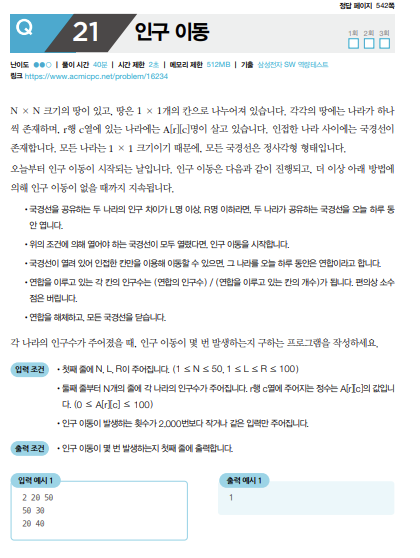

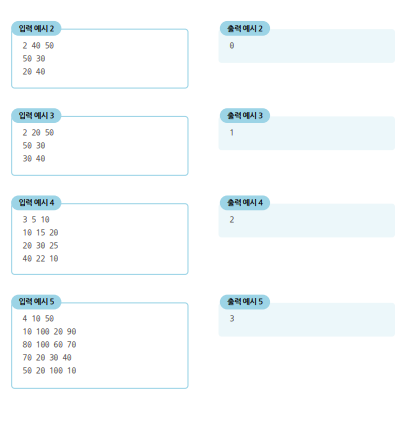

### 1. 이 문제를 읽고 든 생각은 BFS를 이용해야 겠구나 였습니다.

### 2.    국경선을 공유하는 두 나라의 인구 차이가 L명 이상,R명 이하라면, 두 나라가 공유하는 국경선을 오늘 하루 동안 연다. 위의 조건에 의해 열어야 하는 국경선이 모두 열렸다면, 인구 이동을 시작한다. 국경선이 열려있어 인접한 칸만을 이용해 이동할 수 있으면, 그 나라를 오늘 하루 동안은 연합이라고 한다. 연합을 이루고 있는 각 칸의 인구수는 (연합의 인구수) / (연합을 이루고 있는 칸의 개수)가 된다. 편의상 소수점은 버린다.연합을 해체하고, 모든 국경선을 닫는다. 이제 조건들을 하나하나 살펴보겠습니다.

### 3.먼저 첫 번째 조건을 구현하기 위해 일반적인 BFS 구현 function에서 temp라는 리스트를 만들어서 국경선을 공유하고 있는 나라들의 좌표값을 넣어줬습니다.

### 4.그다음 두 번째 세 번째 조건을 만족하기 위해, 국경선이 열려있다면, flag를 1로 바꿔서 인구 이동이 시작됨을 표시해주고 국경을 공유하고 있는 모든 나라들의 합에서 국경을 공유하고 있는 나라들의 개수로 나눠준 뒤, 그 값을 국경을 공유하고 있는(temp에 넣어줬던) 나라들의 인구수에 넣어줍니다.

### 5.모든 조건이 완료 되었으면(더이상 인구이동이 일어나지 않으면) flag를 0으로 바꾸고, while문을 종료해 줍니다.while문이 한번 돌 때마다 ( 인구이동이 동시에 한번 일어날 때마다) result값을 1씩 더해준 뒤, while문이 종료되면 result 값을 출력해주면 됩니다.

In [5]:
import sys
from collections import deque

'''
N X N 크기의 땅!!
r행 c열에 있는 나라에는 A[r][c]명이 살고 있습니다

'''
graph = []
n,l,r = map(int,input().split())
for _ in range(n):
    graph.append(list(map(int,input().split())))

    
print(graph)  ## 중간에 그래프 확인!!
    
dx = [0,0,1,-1]
dy = [1,-1,0,0]

def bfs(a,b):
    q = deque()
    temp = []
    q.append((a,b))
    temp.append((a,b))
    while q:
        x,y = q.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if 0<=nx<n and 0<=ny<n and visited[nx][ny] == 0:
                # 국경선을 공유하는 두 나라의 인구 차이가 L명 이상, R명 이하라면, 두 나라가 공유하는 국경선을 오늘 하루 동안 연다.
                if l<=abs(graph[nx][ny]-graph[x][y])<=r:
                    visited[nx][ny] = 1
                    q.append((nx,ny))
                    temp.append((nx,ny))
    return temp
            
result = 0

while 1:
    visited = [[0] * (n+1) for _ in range(n+1)]
    flag = 0
    for i in range(n):
        for j in range(n):
            if visited[i][j] == 0:
                visited[i][j] = 1
                country = bfs(i,j)
                # 위의 조건에 의해 열어야하는 국경선이 모두 열렸다면, 인구 이동을 시작한다.
                if len(country) > 1:
                    flag = 1
                    # 연합을 이루고 있는 각 칸의 인구수는 (연합의 인구수) / (연합을 이루고 있는 칸의 개수)가 된다. 편의상 소수점은 버린다.
                    number = sum([graph[x][y] for x, y in country]) // len(country)
                    for x,y in country:
                        graph[x][y] = number
    # 연합을 해체하고, 모든 국경선을 닫는다.
    if flag == 0:
        break
    result += 1
print("\n",result)

2 40 50
50 30
20 40
[[50, 30], [20, 40]]

 0


## 답지VER

In [1]:
from collections import deque

# 땅의 크기(N), L, R 값을 입력받기
n, l, r = map(int, input().split())

# 전체 나라의 정보(N x N)를 입력 받기
graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))

dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

# 특정 위치에서 출발하여 모든 연합을 체크한 뒤에 데이터 갱신
def process(x, y, index):
    # (x, y)의 위치와 연결된 나라(연합) 정보를 담는 리스트
    united = []
    united.append((x, y))
    # 너비 우선 탐색 (BFS)을 위한 큐 라이브러리 사용
    q = deque()
    q.append((x, y))
    union[x][y] = index # 현재 연합의 번호 할당
    summary = graph[x][y] # 현재 연합의 전체 인구 수
    count = 1 # 현재 연합의 국가 수
    # 큐가 빌 때까지 반복(BFS)
    while q:
        x, y = q.popleft()
        # 현재 위치에서 4가지 방향을 확인하며
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 바로 옆에 있는 나라를 확인하여
            if 0 <= nx < n and 0 <= ny < n and union[nx][ny] == -1:
                # 옆에 있는 나라와 인구 차이가 L명 이상, R명 이하라면
                if l <= abs(graph[nx][ny] - graph[x][y]) <= r:
                    q.append((nx, ny))
                    # 연합에 추가하기
                    union[nx][ny] = index
                    summary += graph[nx][ny]
                    count += 1
                    united.append((nx, ny))
    # 연합 국가끼리 인구를 분배
    for i, j in united:
        graph[i][j] = summary // count

total_count = 0

# 더 이상 인구 이동을 할 수 없을 때까지 반복
while True:
    union = [[-1] * n for _ in range(n)]
    index = 0
    for i in range(n):
        for j in range(n):
            if union[i][j] == -1: # 해당 나라가 아직 처리되지 않았다면
                process(i, j, index)
                index += 1
    # 모든 인구 이동이 끝난 경우
    if index == n * n:
        break
    total_count += 1

# 인구 이동 횟수 출력
print(total_count)

2 40 50 
50 30
20 40
0
